In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq, irfft

### Homework 3.6 - Voice Changer

We will try to make a simple voice changer by manipulating the frequency domain.

In this problem, you will have to make a short vocal record of about 10-15 seconds (no noise). Play around with the frequency domain to change the pitch of the audio and then invert it back to time domain in order to test the new voice. Make at least 2 new different voices.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

Put the data into an array using wavfile from scipy.io. This will give us a tuple of the sampling rate (frequency (freq)) and the data (y).

In [2]:
freq, y = wavfile.read('voice_changer_original.wav')

Create a time array by computing the interval between the data points. Since the data points are separated by 1/freq (dt), we can create the array that has dt as an interval between the data points.

In [3]:
dt = 1/freq
t = np.linspace(0, (len(y)-1)*dt, len(y))

Plot t and y in the time domain.

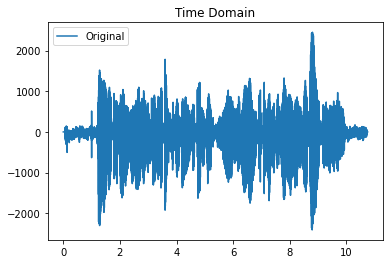

In [4]:
plt.plot(t, y, label='Original')
plt.title('Time Domain')
plt.legend()

- Convert into the frequency domain. yf is the complex array of fourier transform of y. xf is the frequency domain of the interval between data points. To plot, we need to convert yf, the complex array, to the absolute of yf. Moreover, as the pitch depends on the frequency of a sound wave, we can change the pitch of the audio by modifying its frequency.
- Invert it back to time domain in order to test the new voice.
- Save it using wavfile.write(filename, sampling rate, array in int16).

1st voice

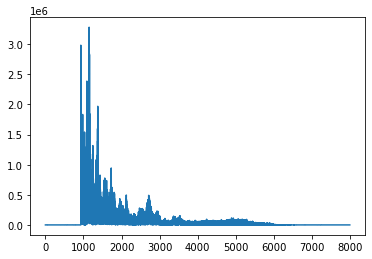

In [5]:
n = len(t)
yf = np.roll(rfft(y), 10000)
xf = rfftfreq(n, dt)
plt.plot(xf, np.abs(yf))

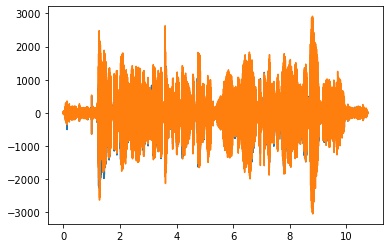

In [6]:
new_f_changed = irfft(yf)
plt.plot(t, y)
plt.plot(t, new_f_changed)

In [7]:
wavfile.write('voice_changer_changed_1.wav', freq, np.array(new_f_changed, dtype=np.int16))

2nd voice

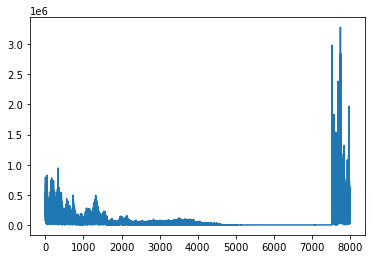

In [8]:
n = len(t)
yf = np.roll(rfft(y), -5000)
xf = rfftfreq(n, dt)
plt.plot(xf, np.abs(yf))

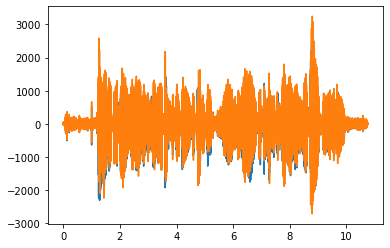

In [9]:
new_f_changed = irfft(yf)
plt.plot(t, y)
plt.plot(t, new_f_changed)

In [10]:
wavfile.write('voice_changer_changed_2.wav', freq, np.array(new_f_changed, dtype=np.int16))